## 3. Modélisation

### 3.2 Données images :

#### 3.2.9 Deep Learning : Resnet avec ImageDataGenerator 

Nous allons faire la même chose que précédemment mais avec Resnet cette fois-ci.

On commence par importer les packages et notre jeu de données :

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv('X_train_update.csv',index_col=0)
y=pd.read_csv('Y_train_CVw08PX.csv',index_col=0)

In [2]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt
import time, cv2
import seaborn as sns

import pandas as pd
from sklearn.model_selection import train_test_split

from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras import backend as K

In [3]:
import os
import itertools
import sys
import xml.etree.ElementTree as ET
from collections import Counter
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from keras.applications.resnet50 import ResNet50
from keras import backend as K
from keras.callbacks import Callback
from keras.layers import Dense
from keras.models import Model
from PIL import Image
from sklearn.metrics import (f1_score,
                             precision_score,
                             recall_score)

%matplotlib inline

On crée une nouvelle colonne image_name : 

In [4]:
#Création d'une colonne image_name:
data['image_name'] = data.astype('str').apply(lambda row: 'image_'+row['imageid']+'_product_'+row['productid']+'.jpg',axis = 1)

On joint notre variable cible à nos variables explicatives et on réinitialise les index.

In [5]:
#On joint les features et target :
data=data.join(y)
#On crée un index :
data=data.reset_index()
data

,index,designation,description,productid,imageid,image_name,prdtypecode
0,0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,image_1263597046_product_3804725264.jpg,10
1,1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,image_1008141237_product_436067568.jpg,2280
2,2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,image_938777978_product_201115110.jpg,50
3,3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,image_457047496_product_50418756.jpg,1280
4,4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,image_1077757786_product_278535884.jpg,2705
...,...,...,...,...,...,...,...
84911,84911,The Sims [ Import Anglais ],NaN,206719094,941495734,image_941495734_product_206719094.jpg,40
84912,84912,Kit piscine acier NEVADA déco pierre Ø 3.50m x...,<b>Description complète :</b><br />Kit piscine...,3065095706,1188462883,image_1188462883_product_3065095706.jpg,2583
84913,84913,Journal Officiel De La Republique Francaise N°...,NaN,440707564,1009325617,image_1009325617_product_440707564.jpg,2280
84914,84914,Table Basse Bois De Récupération Massif Base B...,<p>Cette table basse a un design unique et con...,3942400296,1267353403,image_1267353403_product_3942400296.jpg,1560


In [6]:
import os 
os.getcwd()

'C:\\Users\\kaout\\anaconda3\\Anaconda'

On crée une nouvelle colonne 'img_paths' qui contient le chemin d'accès vers nos images.

In [7]:
#Création d'une colonne image_name:
data['img_paths'] = data.astype('str').apply(lambda row: 'C:\\Users\\kaout\\anaconda3\\Anaconda\\images\\images\\image_train\\'+row['image_name'],axis = 1)

In [9]:
data

,index,designation,description,productid,imageid,image_name,prdtypecode,img_paths
0,0,Partition De Musique : Le Quadrille De Bébé : ...,NaN,439040846,1008633917,image_1008633917_product_439040846.jpg,10,C:\Users\kaout\anaconda3\Anaconda\images\image...
1,1,Indian Geography In The 21st Century: The Youn...,NaN,854500992,1299560569,image_1299560569_product_854500992.jpg,10,C:\Users\kaout\anaconda3\Anaconda\images\image...
2,2,Business Strategy: Plan Execute Win!,NaN,261976953,1002574711,image_1002574711_product_261976953.jpg,10,C:\Users\kaout\anaconda3\Anaconda\images\image...
3,3,All Dressed In White,NaN,653234997,1077388749,image_1077388749_product_653234997.jpg,10,C:\Users\kaout\anaconda3\Anaconda\images\image...
4,4,Dialogues De Bêtes De Colette - Fiche De Lecture,NaN,476568317,1274382915,image_1274382915_product_476568317.jpg,10,C:\Users\kaout\anaconda3\Anaconda\images\image...
...,...,...,...,...,...,...,...,...
20623,20623,Tropico 6 El Prez Edition - Jeu En Téléchargement,<div> <p><strong>NOTE :</strong> Un compte Ste...,3839640325,1251288882,image_1251288882_product_3839640325.jpg,2905,C:\Users\kaout\anaconda3\Anaconda\images\image...
20624,20624,Carribean Riddle - Jeu En Téléchargement,<p>En plus d&#39;assembler des pierres précieu...,1711729235,1100067348,image_1100067348_product_1711729235.jpg,2905,C:\Users\kaout\anaconda3\Anaconda\images\image...
20625,20625,Hospital Tycoon - Jeu En Téléchargement,NOTE : Code d&#39;activation à utiliser exclus...,1711736053,1100063176,image_1100063176_product_1711736053.jpg,2905,C:\Users\kaout\anaconda3\Anaconda\images\image...
20626,20626,Mafia Triple Pack - Jeu En Téléchargement,<div> <p><strong>NOTE :</strong> un compte Ste...,2541020628,1148324100,image_1148324100_product_2541020628.jpg,2905,C:\Users\kaout\anaconda3\Anaconda\images\image...


On ne garde que notre variable cible et notre nouvelle colonne 'img_paths'.

In [8]:
df=data[["prdtypecode","img_paths"]]

In [9]:
df

,prdtypecode,img_paths
0,10,C:\Users\kaout\anaconda3\Anaconda\images\image...
1,2280,C:\Users\kaout\anaconda3\Anaconda\images\image...
2,50,C:\Users\kaout\anaconda3\Anaconda\images\image...
3,1280,C:\Users\kaout\anaconda3\Anaconda\images\image...
4,2705,C:\Users\kaout\anaconda3\Anaconda\images\image...
...,...,...
84911,40,C:\Users\kaout\anaconda3\Anaconda\images\image...
84912,2583,C:\Users\kaout\anaconda3\Anaconda\images\image...
84913,2280,C:\Users\kaout\anaconda3\Anaconda\images\image...
84914,1560,C:\Users\kaout\anaconda3\Anaconda\images\image...


On teste notre chemin d'accès :

In [10]:
test = df.img_paths[1]

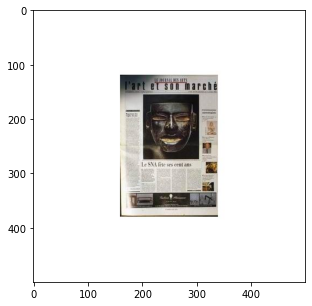

In [11]:
img_test = plt.imread(test)
plt.figure(figsize = (5,5))
plt.imshow(img_test)

On crée une colonne class, qui contient les valeurs les différentes catégories renommées de 0 à 26.

In [12]:
#Création d'une colonne class:
df['class'] = df.astype('str').apply(lambda row: row['prdtypecode'],axis = 1)

<ipython-input-12-6fbd9a08ab32>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'] = df.astype('str').apply(lambda row: row['prdtypecode'],axis = 1)


In [13]:
df['class']= df['class'].replace(to_replace=['10','40','50','60','1140','1160','1180','1280','1281','1300','1301','1302','1320','1560','1920',
              '1940','2060','2220','2280','2403','2462','2522','2582','2583','2585','2705','2905'],
             value=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20',
              '21','22','23','24','25','26'])
df

<ipython-input-13-a9437ca5b404>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class']= df['class'].replace(to_replace=['10','40','50','60','1140','1160','1180','1280','1281','1300','1301','1302','1320','1560','1920',


,prdtypecode,img_paths,class
0,10,C:\Users\kaout\anaconda3\Anaconda\images\image...,0
1,2280,C:\Users\kaout\anaconda3\Anaconda\images\image...,18
2,50,C:\Users\kaout\anaconda3\Anaconda\images\image...,2
3,1280,C:\Users\kaout\anaconda3\Anaconda\images\image...,7
4,2705,C:\Users\kaout\anaconda3\Anaconda\images\image...,25
...,...,...,...
84911,40,C:\Users\kaout\anaconda3\Anaconda\images\image...,1
84912,2583,C:\Users\kaout\anaconda3\Anaconda\images\image...,23
84913,2280,C:\Users\kaout\anaconda3\Anaconda\images\image...,18
84914,1560,C:\Users\kaout\anaconda3\Anaconda\images\image...,13


On sépare le jeu de données df en un ensemble d'entraînement data_train et en un ensemble de test data_test. Nous choisirons un rapport de 80% pour les données d'entraînements.


In [14]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(df, test_size=0.2, random_state=123)

In [15]:
data_train

,prdtypecode,img_paths,class
54169,1140,C:\Users\kaout\anaconda3\Anaconda\images\image...,4
1283,1940,C:\Users\kaout\anaconda3\Anaconda\images\image...,15
69362,2280,C:\Users\kaout\anaconda3\Anaconda\images\image...,18
71316,1920,C:\Users\kaout\anaconda3\Anaconda\images\image...,14
54116,1280,C:\Users\kaout\anaconda3\Anaconda\images\image...,7
...,...,...,...
63206,2582,C:\Users\kaout\anaconda3\Anaconda\images\image...,22
61404,40,C:\Users\kaout\anaconda3\Anaconda\images\image...,1
17730,1281,C:\Users\kaout\anaconda3\Anaconda\images\image...,8
28030,1300,C:\Users\kaout\anaconda3\Anaconda\images\image...,9


On lance notre générateur de données ImageDataGenerator :

In [32]:
#Générateur de données

from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
train_data_generator = ImageDataGenerator(
        preprocessing_function = preprocess_input,
        # data augmentation
        rotation_range = 10,
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        zoom_range = 1.1,
        horizontal_flip = True
        )

test_data_generator = ImageDataGenerator(
    preprocessing_function = preprocess_input)


Itérateur permettant de générer à chaque itération (lors de l'apprentissage) un nouveau lot de données :

In [33]:
#Itérateur permettant de générer à chaque itération (lors de l'apprentissage) un nouveau lot de données
batch_size = 32

data_train["class"] = data_train["class"].astype(str)
data_test["class"] = data_test["class"].astype(str)

train_generator = train_data_generator.flow_from_dataframe(dataframe=data_train,
                                                          directory="",
                                                           x_col = "img_paths",
                                                           y_col = "class",
                                                          class_mode ="sparse",
                                                          target_size = (224 , 224), 
                                                          batch_size = batch_size)

test_generator = test_data_generator.flow_from_dataframe(dataframe=data_test,
                                                         directory="",
                                                         shuffle = False,
                                                         x_col = "img_paths",
                                                         y_col = "class",
                                                         class_mode ="sparse",
                                                         target_size = (224 , 224), 
                                                         batch_size = batch_size)

<ipython-input-33-07f7b81952da>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train["class"] = data_train["class"].astype(str)
<ipython-input-33-07f7b81952da>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["class"] = data_test["class"].astype(str)


Found 67932 validated image filenames belonging to 27 classes.
Found 16984 validated image filenames belonging to 27 classes.


On applique un poid à chaque classe :

In [34]:
labels_count = Counter(data_train['class'])
total_counts = sum(labels_count.values())
class_weights = {train_generator.class_indices[cls]: total_counts / count for cls, count in labels_count.items()}
class_weights

{21: 32.058518168947614,
 7: 108.171974522293,
 10: 17.89567966280295,
 6: 19.76491125981961,
 24: 17.303107488537954,
 8: 17.272311212814646,
 11: 17.900395256916998,
 26: 16.819014607576133,
 16: 8.320921117099461,
 17: 34.50076180802438,
 5: 16.544568923526548,
 9: 100.93907875185735,
 25: 41.04652567975831,
 4: 26.067536454336146,
 3: 34.205438066465256,
 1: 33.4146581406788,
 14: 17.0,
 0: 27.010735586481115,
 15: 32.89685230024213,
 13: 60.491540516473734,
 22: 21.483870967741936,
 18: 30.53123595505618,
 12: 50.6955223880597,
 2: 104.03062787136294,
 19: 96.08486562942008,
 23: 108.6912,
 20: 103.5548780487805}

On visualise rapidement le nombre de produit dans chaque class :

C:\Users\kaout\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


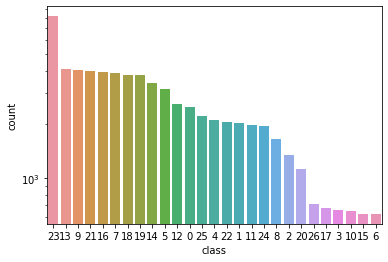

In [42]:
ax = sns.countplot(data_train['class'], order=[k for k, _ in labels_count.most_common()], log=True)

On paramètre notre modèle, en utilisant un modèle déjà préentrainé ResNet50 :

In [35]:
# Modèle Resnet
base_model = ResNet50(weights='imagenet', include_top=False) 
# Freezer les couches du ResNet50
for layer in base_model.layers: 
    layer.trainable = False

model = Sequential()
model.add(base_model) # Ajout du modèle ResNet50
model.add(GlobalAveragePooling2D()) 
model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(27, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, None, None, 2048)  23587712  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 27)               

Entraînement du modèle par "batchs" :

In [36]:
history = model.fit_generator(generator=train_generator, 
                                epochs = 5,
                                steps_per_epoch = len(data_train)//batch_size,
                                validation_data = test_generator,
                                validation_steps = len(data_test)//batch_size,
                                class_weight=class_weights
                                
                             )

Epoch 1/5
2122/2122 [==============================] - 3890s 2s/step - loss: 69.5125 - acc: 0.2601 - val_loss: 1.8278 - val_acc: 0.4530
Epoch 2/5
2122/2122 [==============================] - 4659s 2s/step - loss: 64.7107 - acc: 0.3078 - val_loss: 1.7757 - val_acc: 0.4645
Epoch 3/5
2122/2122 [==============================] - 3783s 2s/step - loss: 63.2912 - acc: 0.3189 - val_loss: 1.9174 - val_acc: 0.4257
Epoch 4/5
2122/2122 [==============================] - 3784s 2s/step - loss: 62.5205 - acc: 0.3306 - val_loss: 1.7602 - val_acc: 0.4774
Epoch 5/5
2122/2122 [==============================] - 3766s 2s/step - loss: 61.9816 - acc: 0.3314 - val_loss: 1.7825 - val_acc: 0.4590


Les résultats sont moins bons qu'avec VGG16.

On trace l'évolution des précisions tout au long de l'entraînement.

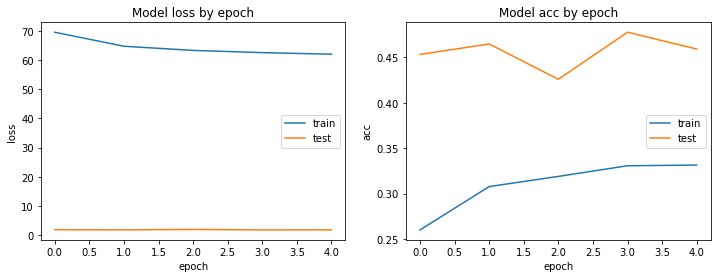

In [54]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc by epoch')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

Evaluation de notre modèle :

In [37]:
Y_pred = model.predict_generator(generator = test_generator)
y_pred =  np.argmax(Y_pred, axis=-1)

Instructions for updating:
Please use Model.predict, which supports generators.


Matrice de confusion :

In [38]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))


Confusion Matrix
[[ 186   44    1    0    0    0    3   15    2    0   61   13    0    9
     3    0    0    0  206   10    4    2   24   13    2    2    1]
 [   4  215    3    6    5    1    0    5    1    5    5    5   11   18
     1    0    0    8   36   58   55    1   13    7    0    2   10]
 [   0    0   92    5    4    3    1    7    0    2    0    0    2    0
     6    0    2    2    2    1   12    3    1    1    0    0    8]
 [   0    6   20  191   36    5    1   12   10   37    0    0   28    3
     2   22    6   13    3    0   27    4    1    0   11    2   65]
 [   0    1   27   81  235   36   19   27   17   32    0    1    7    3
    11    9   19    8    4    2   30   13    0    2   25    5   21]
 [   1    1   24   52   77  478   68    8   32   18    2    0    8    5
    14   38   10   38    7    0   47    2    1    1    5    3   27]
 [   2    2    9   14   46   33  677    5   22    9    2    1    0    1
     7   10    3    7    1    3    1    2    0    2    2    1    4]
 [ 

Classification Report :

In [39]:
print('Classification Report')
#target_names = ['', '', '']
#print(classification_report(test_generator.classes, y_pred, target_names=target_names))
print(classification_report(test_generator.classes, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.39      0.31      0.35       601
           1       0.28      0.45      0.35       475
           2       0.26      0.60      0.36       154
           3       0.19      0.38      0.25       505
           4       0.30      0.37      0.33       635
           5       0.57      0.49      0.53       967
           6       0.69      0.78      0.73       866
           7       0.24      0.72      0.36       175
           8       0.61      0.28      0.39      1060
           9       0.16      0.37      0.22       151
          10       0.67      0.53      0.59       964
          11       0.76      0.29      0.42       979
          12       0.20      0.21      0.21       341
          13       0.29      0.47      0.36       298
          14       0.73      0.44      0.55       993
          15       0.43      0.32      0.37       524
          16       0.89      0.53      0.66      2045
     

Résultat interessant mais le VGG16 a donné mieux.

On affiche une matrice de confusion sous forme de tableau coloré pour y voir plus clair:

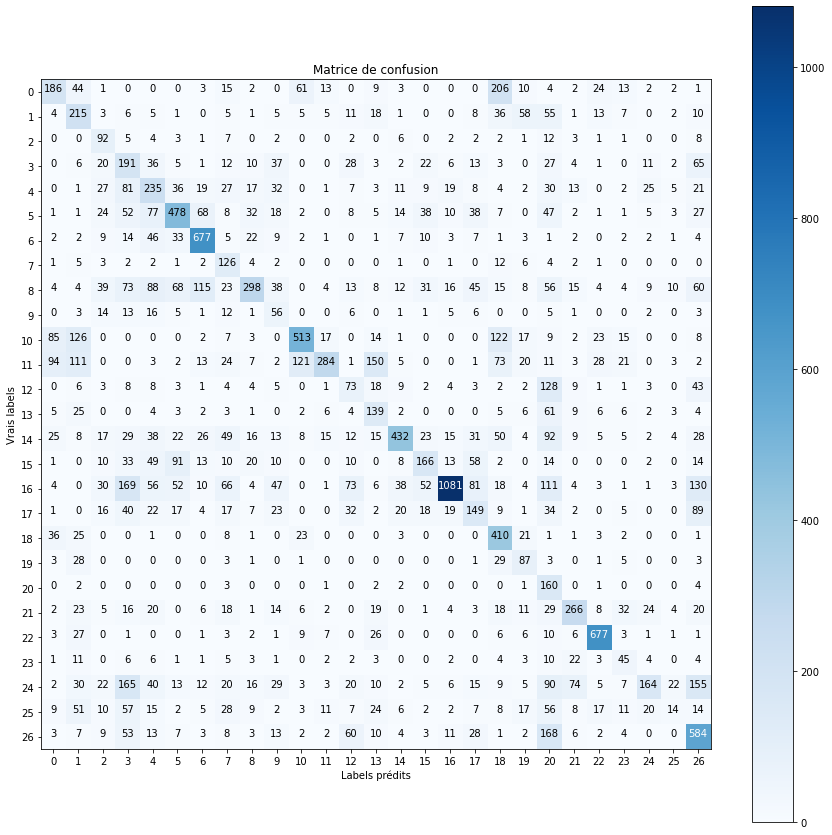

In [40]:
#Matrice confusion :
cnf_matrix =confusion_matrix(test_generator.classes, y_pred)


###Optionnel: Afficher une matrice de confusion sous forme de tableau coloré
import matplotlib.pyplot as plt
from matplotlib import cm
import itertools
classes = range(0,27)

plt.figure(figsize=(15,15))

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

On va essayer de relancer notre modèle sans prendre en compte le poid que nous avons calculé précédemment.

Entraînement du modèle par "batchs" :

In [55]:
history = model.fit_generator(generator=train_generator, 
                                epochs = 5,
                                steps_per_epoch = len(data_train)//batch_size,
                                validation_data = test_generator,
                                validation_steps = len(data_test)//batch_size
                                
                             )

Epoch 1/5
2122/2122 [==============================] - 3728s 2s/step - loss: 2.0679 - acc: 0.3935 - val_loss: 1.5331 - val_acc: 0.5336
Epoch 2/5
2122/2122 [==============================] - 3999s 2s/step - loss: 1.9970 - acc: 0.4120 - val_loss: 1.5115 - val_acc: 0.5413
Epoch 3/5
2122/2122 [==============================] - 3914s 2s/step - loss: 1.9795 - acc: 0.4166 - val_loss: 1.5029 - val_acc: 0.5426
Epoch 4/5
2122/2122 [==============================] - 3961s 2s/step - loss: 1.9954 - acc: 0.4136 - val_loss: 1.5146 - val_acc: 0.5388
Epoch 5/5
2122/2122 [==============================] - 3794s 2s/step - loss: 2.0102 - acc: 0.4116 - val_loss: 1.5054 - val_acc: 0.5468


On trace l'évolution des précisions tout au long de l'entraînement.

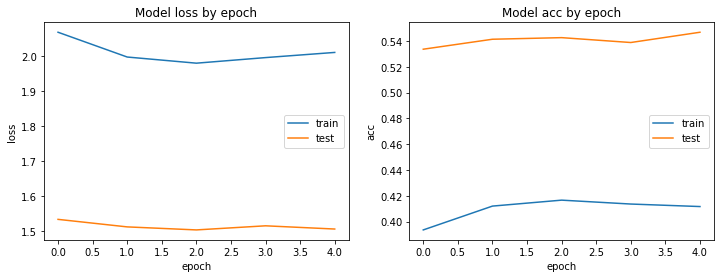

In [57]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc by epoch')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

Evaluation modèle :

In [58]:
Y_pred = model.predict_generator(generator = test_generator)
y_pred =  np.argmax(Y_pred, axis=-1)

In [4]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

Classification Report :

In [60]:
print('Classification Report')
#target_names = ['', '', '']
#print(classification_report(test_generator.classes, y_pred, target_names=target_names))
print(classification_report(test_generator.classes, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.54      0.13      0.21       601
           1       0.42      0.43      0.43       475
           2       0.76      0.39      0.52       154
           3       0.37      0.34      0.36       505
           4       0.48      0.33      0.39       635
           5       0.58      0.51      0.54       967
           6       0.63      0.83      0.72       866
           7       0.67      0.58      0.62       175
           8       0.43      0.50      0.46      1060
           9       0.41      0.37      0.39       151
          10       0.55      0.73      0.63       964
          11       0.63      0.54      0.58       979
          12       0.53      0.23      0.32       341
          13       0.77      0.12      0.21       298
          14       0.67      0.53      0.60       993
          15       0.58      0.31      0.40       524
          16       0.62      0.87      0.72      2045
     

En regardant notre F1-score = 0.52, on constate qu'on s'est rapproché de l'objectif fixé par le challenge qui était de 0.55.

Matrice de confusion :

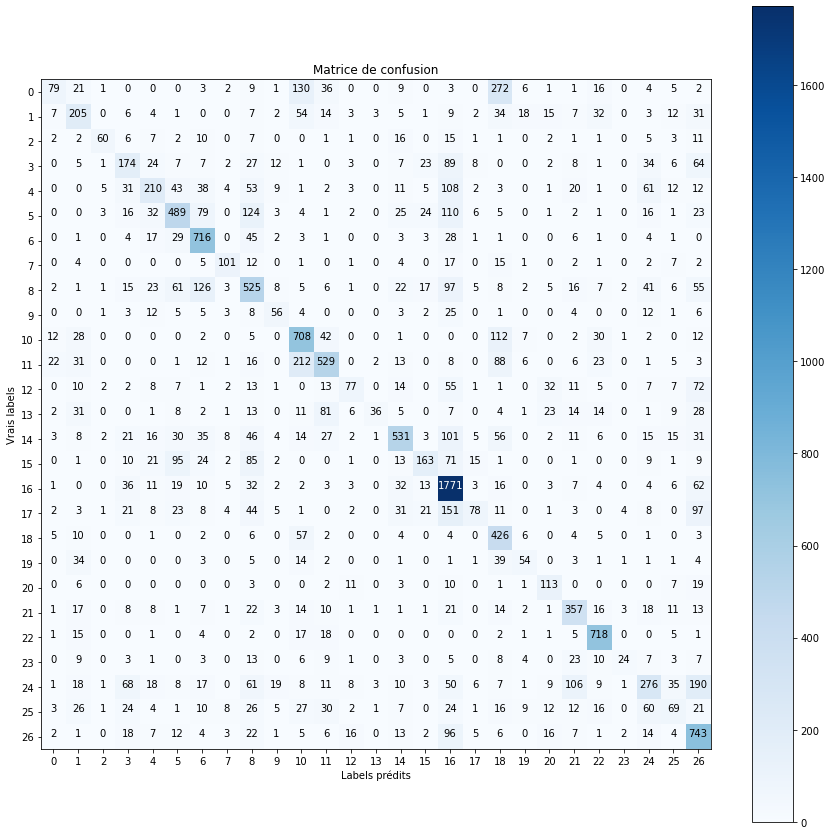

In [61]:
#Matrice confusion :
cnf_matrix =confusion_matrix(test_generator.classes, y_pred)


###Optionnel: Afficher une matrice de confusion sous forme de tableau coloré
import matplotlib.pyplot as plt
from matplotlib import cm
import itertools
classes = range(0,27)

plt.figure(figsize=(15,15))

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

Notre matrice de confusion a plutôt belle allure comparé à toute les précedentes même si les labels mal prédits restent importants.

On n'oublie pas de sauvegarder notre modèle pour pouvoir le réutiliser car il a mis enormement de temps à s'entraîner:

In [64]:
import tensorflow as tf
filepath = 'resnet.h5'

tf.keras.models.save_model(
    model, filepath, overwrite=True, include_optimizer=True, save_format=None,
    signatures=None, options=None
)

In [65]:
# save model and architecture to single file
model.save("modelresnet.h5")
print("Saved model to disk")

Saved model to disk


Conclusion : 

Pour conclure, nous retenons ce dernier modèle utilisant ImageDataGenerator et Resnet50 car c'est celui qui nous a donné le meilleur F1-score et c'est celui qui se rapproche le plus de l'objectif du challenge qui est de 0.55.

Par manque de temps nous n'avons pas pu aller plus loin mais nous sommes assez satisfait du travail effectué sur la partie image car cette partie nous a posé pas mal de difficulté à cause de la quantité importante d'images.